In [1]:
# importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from tqdm import tqdm
import nltk
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [2]:
# loading the dataset

df = pd.read_csv('UpdatedResumeDataSet.csv')
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [3]:
# checking the shape

df.shape

(962, 2)

In [4]:
# checking for null values

df.isnull().sum()

Category    0
Resume      0
dtype: int64

# Analyzing the category column

In [7]:
df['Category'].unique().tolist()

['Data Science',
 'HR',
 'Advocate',
 'Arts',
 'Web Designing',
 'Mechanical Engineer',
 'Sales',
 'Health and fitness',
 'Civil Engineer',
 'Java Developer',
 'Business Analyst',
 'SAP Developer',
 'Automation Testing',
 'Electrical Engineering',
 'Operations Manager',
 'Python Developer',
 'DevOps Engineer',
 'Network Security Engineer',
 'PMO',
 'Database',
 'Hadoop',
 'ETL Developer',
 'DotNet Developer',
 'Blockchain',
 'Testing']

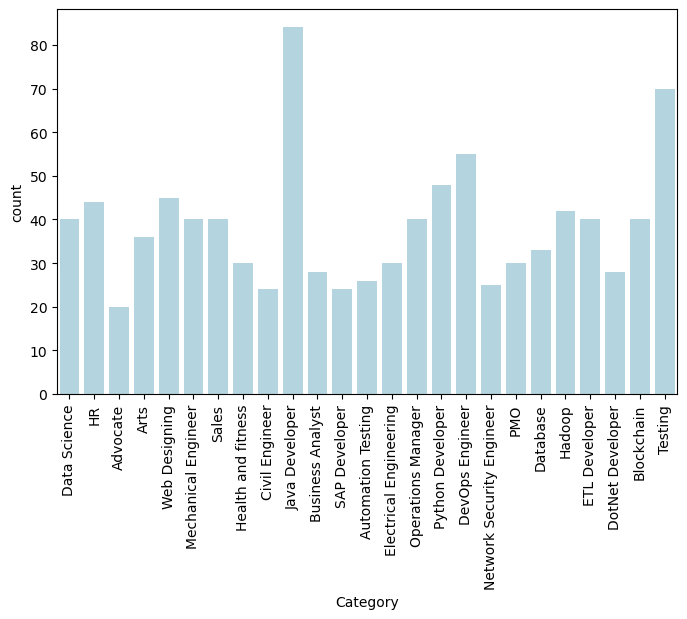

In [12]:
plt.figure(figsize = (8, 5))
sns.countplot(data = df, x = 'Category', color = 'lightblue')
plt.xticks(rotation = 'vertical')
plt.show()

Since the Category values are in text we are mapping the values to numbers

In [13]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['Category'] = label.fit_transform(df['Category'])
df.head()

,Category,Resume
0,6,Skills * Programming Languages: Python (pandas...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...
2,6,"Areas of Interest Deep Learning, Control Syste..."
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,6,"Education Details \r\n MCA YMCAUST, Faridab..."


# Data Cleaning

In [14]:
import re

def clean(x):
    xxx = x.lower().split()
    y = []
    for x in xxx:
        x = re.sub('http\S+', '', x)
        x = re.sub('.com\S+', '', x)
        x = re.sub('#\S+', '', x)
        x = re.sub('[^a-zA-Z]', ' ', x)
        y.append(x.strip())
    return (' '.join(y))
    
    
df['clean'] = df['Resume'].apply(lambda x: clean(x))

In [15]:
df.head()

,Category,Resume,clean
0,6,Skills * Programming Languages: Python (pandas...,skills programming languages python pandas nu...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,education details may to may b e uit rgpv da...
2,6,"Areas of Interest Deep Learning, Control Syste...",areas of interest deep learning control system...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skills r python sap hana tableau sap hana...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",education details mca ymcaust faridabad haryan...


# Model Building

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(stop_words='english')
tf.fit(df['clean'])
X = tf.transform(df['clean']).toarray()
Y = df['Category'].values

In [20]:
# spliting the dataset

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=0)
print('X_train shape : ', X_train.shape)
print('Y_train shape : ', Y_train.shape)
print('X_test shape : ', X_test.shape)
print('Y_test shape : ', Y_test.shape)

X_train shape :  (644, 7013)
Y_train shape :  (644,)
X_test shape :  (318, 7013)
Y_test shape :  (318,)


# K Nearest Neighbour

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

train_pre = knn.predict(X_train)
print('Training data Accuracy score : ',accuracy_score(train_pre, Y_train))

test_pre = knn.predict(X_test)
print('Testing data Accuracy score  : ',accuracy_score(test_pre, Y_test))

Training data Accuracy score :  0.9922360248447205
Testing data Accuracy score  :  0.9905660377358491


# Random Forest Classifier

In [38]:
rand = RandomForestClassifier()
rand.fit(X_train, Y_train)

train_pre = rand.predict(X_train)
print('Training data Accuracy score : ',accuracy_score(train_pre, Y_train))

test_pre = rand.predict(X_test)
print('Testing data Accuracy score  : ',accuracy_score(test_pre, Y_test))

Training data Accuracy score :  1.0
Testing data Accuracy score  :  0.9937106918238994


In [39]:
category = { 15: "Java Developer", 23: "Testing", 8: "DevOps Engineer",
             20: "Python Developer", 24: "Web Designing", 12: "HR",
             13: "Hadoop", 3: "Blockchain", 10: "ETL Developer",
             18: "Operations Manager", 6: "Data Science", 22: "Sales",
             16: "Mechanical Engineer", 1: "Arts", 7: "Database", 
             11: "Electrical Engineering", 14: "Health and fitness", 
             19: "PMO", 4: "Business Analyst", 9: "DotNet Developer",
             2: "Automation Testing", 17: "Network Security Engineer",
             21: "SAP Developer", 5: "Civil Engineer", 0: "Advocate"}


In [45]:
def resume_checker(resume):
    resume = clean(myresume)
    resume = tf.transform([resume]).toarray()
    pre = knn.predict(resume)
    return (category[pre[0]])

In [47]:
myresume = """
Objective:
Java developer with [number] years of experience in designing, developing, and maintaining Java applications. Skilled in Java programming, object-oriented design principles, and software development lifecycle. Seeking a challenging role where I can leverage my expertise to contribute to innovative projects and advance my career in software development.

Education:

Bachelor of Science in Computer Science
[University Name], [Location]
Graduated: [Month, Year]
Technical Skills:

Programming Languages: Java, SQL
Java Technologies: Spring Framework, Hibernate, JSP, Servlets
Web Development: HTML, CSS, JavaScript
Database Systems: MySQL, Oracle
Development Tools: Eclipse, IntelliJ IDEA, Maven, Git
Operating Systems: Windows, Linux
Professional Experience:

Java Developer
[Company Name], [Location]
[Dates of Employment]

Designed and developed Java-based web applications using Spring Framework and Hibernate ORM.
Implemented RESTful APIs for seamless integration between front-end and back-end systems.
Optimized application performance through efficient database design and query optimization techniques.
Conducted code reviews and provided constructive feedback to team members to improve code quality.
Collaborated with cross-functional teams to analyze requirements, design solutions, and deliver high-quality software products.
Software Engineer Intern
[Company Name], [Location]
[Dates of Employment]

Assisted in the development and testing of Java applications under the guidance of senior developers.
Participated in agile development methodologies, including sprint planning and daily stand-up meetings.
Contributed to the documentation of software requirements, design specifications, and technical manuals.
Worked closely with QA team to identify and resolve bugs and issues during testing phase.
Projects:

[Project Name]: Description of the project, your role, technologies used, and any notable achievements.
[Project Name]: Description of the project, your role, technologies used, and any notable achievements.
Certifications:

Oracle Certified Professional, Java SE Programmer (OCPJP)
Spring Framework Certification
References:
Available upon request.

Feel free to customize this template with your specific qualifications, experiences, and achievements to create a personalized resume that highlights your strengths as a Java developer."""


value = resume_checker(myresume)

print('This resume belongs to a : ',value)

This resume belongs to a :  Java Developer


In [50]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))
pickle.dump(tf, open('tf.pkl', 'wb'))